# MNIST Digit Recognition Neural Network From Scratch

Handwritten digit recognition using a neural network built from scratch with NumPy.

## Features

- MNIST dataset
- Feedforward network
- Softmax classifier
- Manual backpropagation
- Image classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/train 2.csv")

In [ ]:
data.shape

(42000, 785)

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
X_train[:].shape

(784, 41000)

In [ ]:
Y_train

array([2, 2, 9, ..., 0, 6, 7])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 9 4 ... 2 4 2] [2 2 9 ... 0 6 7]
0.10314634146341463
Iteration:  10
[4 2 6 ... 0 8 0] [2 2 9 ... 0 6 7]
0.1628780487804878
Iteration:  20
[4 2 6 ... 0 8 0] [2 2 9 ... 0 6 7]
0.26963414634146343
Iteration:  30
[4 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.3613658536585366
Iteration:  40
[4 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.4401951219512195
Iteration:  50
[2 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.5053170731707317
Iteration:  60
[2 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.5541707317073171
Iteration:  70
[2 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.592609756097561
Iteration:  80
[2 2 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.6210487804878049
Iteration:  90
[2 4 4 ... 0 8 7] [2 2 9 ... 0 6 7]
0.6439268292682927
Iteration:  100
[2 4 4 ... 0 5 7] [2 2 9 ... 0 6 7]
0.6627804878048781
Iteration:  110
[2 4 4 ... 0 5 7] [2 2 9 ... 0 6 7]
0.6794146341463415
Iteration:  120
[2 4 4 ... 0 5 7] [2 2 9 ... 0 6 7]
0.6943658536585365
Iteration:  130
[2 4 4 ... 0 5 7] [2 2 9 ... 0 6 7]
0.7067560975609756
Iteration:  140


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


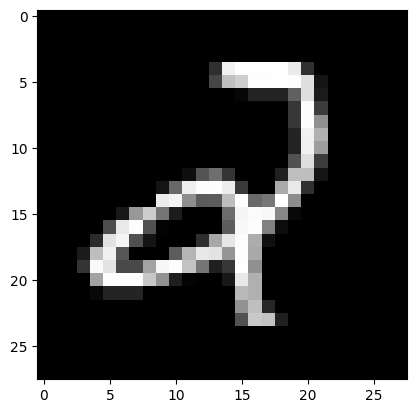

Prediction:  [4]
Label:  2


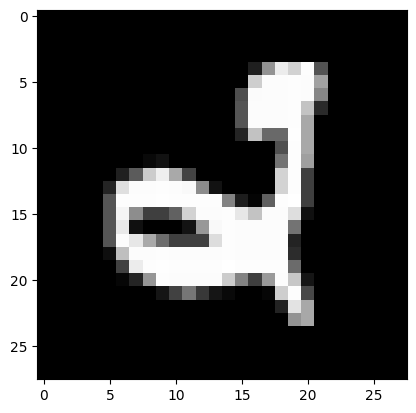

Prediction:  [9]
Label:  9


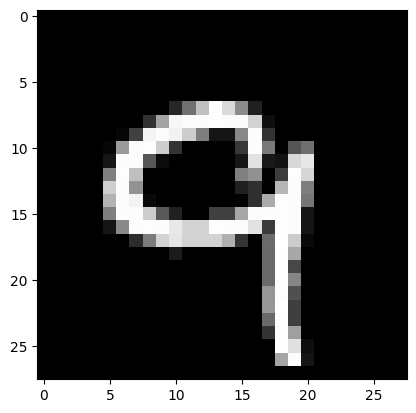

Prediction:  [8]
Label:  8


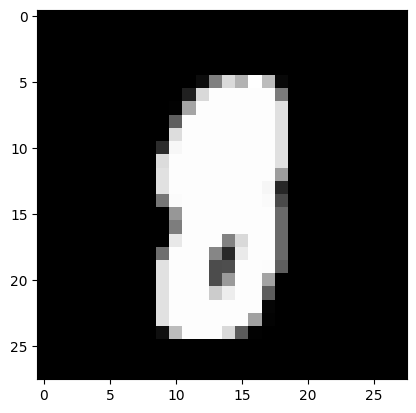

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 1 5 3 8 4 8 1 0 9 9 7 1 4 2 9 6 8 2 8 6 5 3 0 8 0 3 4 8 7 6 4 3 5 5 7 3
 0 5 8 4 8 0 2 7 1 3 7 1 4 2 5 6 4 1 9 7 3 6 0 4 6 5 4 4 1 4 6 5 6 6 7 4 9
 7 4 4 5 8 8 9 3 0 1 8 7 3 2 5 4 0 1 3 1 5 0 0 7 9 2 3 2 7 7 4 8 1 4 5 8 0
 7 8 6 3 2 9 1 3 8 7 3 8 8 3 1 6 1 7 6 4 9 5 1 0 3 6 0 2 1 2 1 3 0 3 8 1 0
 9 4 2 9 4 5 6 1 7 5 7 0 2 3 9 3 9 5 6 4 2 1 8 8 6 7 4 7 1 2 4 6 1 7 8 3 9
 3 7 2 6 1 0 3 2 2 0 8 8 6 0 6 3 3 7 4 5 0 4 6 1 3 5 7 1 3 4 0 4 2 5 3 3 1
 9 1 2 2 7 7 1 6 2 8 7 7 1 6 7 5 4 4 0 7 9 8 9 4 3 5 4 8 1 4 0 8 8 5 9 5 7
 2 4 7 5 6 1 0 8 1 8 9 1 1 9 8 8 0 3 3 1 0 8 9 1 5 3 7 3 6 9 8 9 4 8 6 4 5
 4 8 8 5 3 9 7 3 4 4 6 3 0 4 8 6 2 7 6 2 4 2 8 8 4 6 9 6 6 6 4 3 2 6 5 3 7
 4 9 5 2 6 1 9 2 9 7 7 3 5 6 1 7 2 0 4 7 4 9 0 0 3 8 1 8 0 1 8 4 3 8 7 7 3
 3 4 4 4 1 1 4 5 7 4 8 6 3 8 4 3 9 8 8 5 2 4 5 5 8 6 4 7 6 8 2 7 6 0 6 8 4
 9 3 1 8 1 2 7 7 8 2 6 5 6 6 6 1 1 1 9 5 9 2 1 1 7 2 1 7 0 7 7 4 1 9 7 5 0
 6 9 2 0 2 4 3 8 4 0 8 8 4 0 4 1 9 7 1 6 9 6 8 5 2 4 6 7 3 4 7 4 0 9 3 3 1
 8 6 7 3 1 5 3 9 7 8 8 5 

np.float64(0.822)